In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [78]:
df = pd.read_csv('../car_data.csv')
df = pd.read_csv('../data-test/')

print(df.shape)
df.head()

,الأسم,الموديل,السعر,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,طرف ثالث,التكميلي (جسم المركبة),المجموع,الدفع
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1340.0,1751.0,3090.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1690.0,1050.0,2740.0,NaN
4,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...,1340.0,1000.0,2340.0,NaN


In [80]:
df.columns

Index(['الأسم', 'الموديل', 'السعر', 'لون السيارة', 'نوع الوقود', 'أصل السيارة',
       'رخصة السيارة', 'نوع الجير', 'الزجاج', 'قوة الماتور', 'عداد السيارة',
       'عدد الركاب', 'وسيلة الدفع', 'معروضة', 'أصحاب سابقون', 'إضافات',
       'طرف ثالث', 'التكميلي (جسم المركبة)', 'المجموع', 'الدفع'],
      dtype='object')

In [81]:
column_mapping = {
    'الأسم': 'Name',
    'الموديل': 'Model',
    'السعر': 'Price',
    'لون السيارة': 'Car Color',
    'نوع الوقود': 'Fuel Type',
    'أصل السيارة': 'Vehicle Origin',
    'رخصة السيارة': 'Car License',
    'نوع الجير': 'Transmission Type',
    'الزجاج': 'Glass',
    'قوة الماتور': 'Engine Power',
    'عداد السيارة': 'Car Mileage',
    'عدد الركاب': 'Passenger Count',
    'وسيلة الدفع': 'Payment Method',
    'معروضة': 'Offered',
    'أصحاب سابقون': 'Previous Owners',
    'إضافات': 'Additions',
    'طرف ثالث': 'Third Party',
    'التكميلي (جسم المركبة)': 'Supplementary (Vehicle Body)',
    'المجموع': 'Total',
    'الدفع': 'Drivetrain'
}

df.rename(columns=column_mapping, inplace=True)

In [82]:
df.head()

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Additions,Third Party,Supplementary (Vehicle Body),Total,Drivetrain
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1340.0,1751.0,3090.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1690.0,1050.0,2740.0,NaN
4,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...,1340.0,1000.0,2340.0,NaN


- `Drop` rows with all NaN values Because it will not affect the analysis process

In [83]:
df.dropna(axis=0, how='all', inplace=True)

df.head()

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Additions,Third Party,Supplementary (Vehicle Body),Total,Drivetrain
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1340.0,1751.0,3090.0,NaN
3,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nفتحة...,1690.0,1050.0,2740.0,NaN
4,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\nجنطا...,1340.0,1000.0,2340.0,NaN
6,فيات 127,1982.0,5500.0,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,مُكيّف\nمسجل CD,467.0,500.0,967.0,NaN
7,بيجو 208,2014.0,54000.0,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,مُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغنيسيو...,1035.0,1000.0,2035.0,NaN


* Show all type of car I have with the `frequency` of it.

In [84]:
car_names = df.groupby('Name').size().reset_index(name='count')
car_names

,Name,count
0,Dodge Massey ferguson,1
1,Dodge رام,2
2,أفيكو 50c18دبل كابينه,1
3,أفيكو 150E25,1
4,أفيكو 2000,1
...,...,...
614,هونداي كليك,22
615,هونداي كوبيه,2
616,هونداي كونا,28
617,هونداي ٢٠٠٦,1


Display the data before the `cleaning process`, to see it before and after.

In [87]:
df.describe()

,Model,Price,Engine Power,Third Party,Supplementary (Vehicle Body),Total
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,2008.616259,66933.643211,1740.494755,1154.815705,1272.353730,2427.027972
std,8.690874,57022.973482,589.470714,310.412679,908.570233,1086.714895
min,1967.000000,1111.000000,106.000000,467.000000,500.000000,967.000000
25%,2005.000000,36000.000000,1400.000000,1035.000000,1000.000000,2035.000000
50%,2011.000000,55000.000000,1600.000000,1340.000000,1000.000000,2340.000000
75%,2015.000000,83000.000000,2000.000000,1340.000000,1436.000000,2768.000000
max,2022.000000,999999.000000,9000.000000,1690.000000,17500.000000,18535.000000


- To return `missing value` percent

In [88]:
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).map('{:.2f}%'.format)
missing_percentage

Name                             0.00%
Model                            0.00%
Price                            0.00%
Car Color                        0.00%
Fuel Type                        0.00%
                                 ...  
Additions                        7.30%
Third Party                      0.00%
Supplementary (Vehicle Body)     0.00%
Total                            0.00%
Drivetrain                      79.15%
Length: 20, dtype: object

- `Covert` Data types from `float64` to `int32`

In [89]:
columns_to_convert = ['Model', 'Price','Engine Power']
df[columns_to_convert] = df[columns_to_convert].astype('int32')
df.dtypes

Name                             object
Model                             int32
Price                             int32
Car Color                        object
Fuel Type                        object
                                 ...   
Additions                        object
Third Party                     float64
Supplementary (Vehicle Body)    float64
Total                           float64
Drivetrain                       object
Length: 20, dtype: object

* Drop `insurance columns`, becasue it's will not affect price of car.

In [90]:
df = df.drop(columns=['Third Party', 'Supplementary (Vehicle Body)','Total'],axis=1)

 - Fill missing value `' '` because there is `NaN` values, and when I want to change values to 1 or 0 get an error.
 
 - Use `lambda` function to check if `"فتحة سقف"` inside or not.

In [91]:
df['Additions'] = df['Additions'].fillna('')

df['Sunroof'] = df['Additions'].apply(lambda x: 1 if 'فتحة سقف' in x else 0)

- `Convert` all `Sunroof` to `boolean` type if exists or not.

In [92]:
df['Sunroof'] = df['Sunroof'].astype(bool)
df['Sunroof'].dtype

dtype('bool')

- Drop `Additions` column.

In [93]:
df = df.drop('Additions',axis=1)
df

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Drivetrain,Sunroof
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,NaN,True
3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,NaN,True
4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,NaN,False
6,فيات 127,1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,NaN,False
7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,كيا مورننغ,2015,45000,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2,NaN,False
7772,فورد ترانزيت,2002,48000,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5,دفع خلفي,False
7773,بيجو بارتنر,2018,87000,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,يد صفر,دفع أمامي,False
7774,كيا سورينتو,2017,126000,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,ثانيه,NaN,True


- Drop `Drivetrain` column, because the value of missing value rather that `70%`.

In [94]:
df = df.drop(columns='Drivetrain')

df.head()

,Name,Model,Price,Car Color,Fuel Type,Vehicle Origin,Car License,Transmission Type,Glass,Engine Power,Car Mileage,Passenger Count,Payment Method,Offered,Previous Owners,Sunroof
0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,True
3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,True
4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,False
6,فيات 127,1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,False
7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,False


In [97]:
(df.isnull().sum() / df.shape[0] * 100).map('{:.2f}%'.format)

Name                0.00%
Model               0.00%
Price               0.00%
Car Color           0.00%
Fuel Type           0.00%
                    ...  
Passenger Count    11.32%
Payment Method      0.00%
Offered             0.00%
Previous Owners    24.04%
Sunroof             0.00%
Length: 16, dtype: object

In [98]:
car_mileages = df.groupby('Car Mileage').size().reset_index(name='count')
car_mileages.describe()

,count
count,1224.000000
mean,4.022059
std,9.124397
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,107.000000


Text(0.5, 1.0, 'After Mean Imputation')

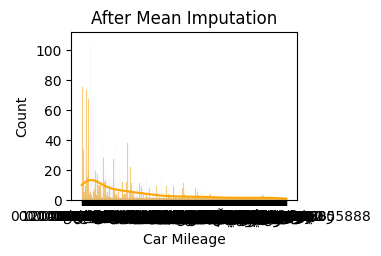

In [102]:
plt.subplot(2, 2, 3)
sns.histplot(df['Car Mileage'], kde=True, color='orange')
plt.title('Car Mileage Distribution')

In [103]:
car_mileages 

,Car Mileage,count
53,100000,107
379,200000,103
645,50000,75
21,00000,73
771,75000,69
...,...,...
520,3001111,1
521,305069,1
522,308654,1
524,310000,1


In [104]:
car_mileages.describe()

,count
count,1224.000000
mean,4.022059
std,9.124397
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,107.000000


In [105]:
car_mileages = df.groupby('Car Mileage')['Car Mileage'].size().reset_index(name='count')

# Add a new column for data types
car_mileages['data_type'] = df['Car Mileage'].dtypes
car_mileages

,Car Mileage,count,data_type
0,!!!!,1,object
1,******,2,object
2,********,1,object
3,-,1,object
4,...,2,object
...,...,...,...
1219,٩٨٠٠٠,1,object
1220,٩٩٩٠٠٠,1,object
1221,٩٩٩٩٩٩,1,object
1222,٩٩٩٩٩٩٩٩٩٩,1,object


- This code defines a function `categorize_mileage` to categorize mileage values based on specific patterns using regular expressions.

- The function is then applied to the `Car Mileage` column of a DataFrame, and the results are stored in a new column called `Mileage_Category`.

In [107]:
mileages = df['Car Mileage']

def categorize_mileage(mileage):
    if pd.isna(mileage):  # Handle NaN values
        return 'Missing'
    elif pd.Series(mileage).str.contains(r'^[0٠]+$').any():
        return 'Zeros - AR/EN'
    elif pd.Series(mileage).str.contains(r'^[!@#$%^&*()_+=\-[\]{};:\'",.<>/?\\|`~\s]+$').any():
        return 'Special Char'
    elif pd.Series(mileage).str.contains(r'^\d{7,}$').any():
        return 'Long value'
    elif pd.Series(mileage).str.contains(r'^[0-9]+$').any():
        return 'EN Num'
    elif pd.Series(mileage).str.contains(r'^[٠-٩]+$').any():
        return 'AR Num'
    elif pd.Series(mileage).str.contains(r'^[\u0600-\u06FF]+$').any():
        return 'AR letters'
    elif pd.Series(mileage).str.contains(r'^\d+\s*الف$|^\d+الف$').any():
        return 'Letters with arabic num'
    else:
        return mileage  # Keep other values unchanged

df['Mileage_Category'] = mileages.apply(categorize_mileage)

- This code defines a function `convert_arabic_numbers` to convert Arabic numbers with `الف or كيلو` to numeric values, applying it to the `Car Mileage` column and creating a new column `Converted_Mileage`. 

- The last line of code displays selected columns for inspection.

In [108]:
# Function to convert Arabic numbers with "الف" or "كيلو" to numeric values
def convert_arabic_numbers(mileage):
    if pd.isna(mileage):
        return mileage

    # Regular expression to find Arabic numbers followed by ((ألف|الف|كيلو|كم|km|Km))
    pattern = re.compile(r'(\d+)\s*(ألف|الف|كيلو|كم|km|Km)')

    match = pattern.search(mileage)
    if match:
        number = int(match.group(1))

        if len(str(number)) < 4:
            return number * 1000
        else:
            return number
    else:
        return int(mileage) if mileage.isdigit() else mileage

# Apply the conversion function to create a new column
df['Converted_Mileage'] = df['Car Mileage'].apply(convert_arabic_numbers)

df[['Car Mileage', 'Mileage_Category','Converted_Mileage']]

,Car Mileage,Mileage_Category,Converted_Mileage
0,75000,EN Num,75000
3,130000,EN Num,130000
4,NaN,Missing,NaN
6,شغال,AR letters,شغال
7,38000,EN Num,38000
...,...,...,...
7771,130000,EN Num,130000
7772,00000,Zeros - AR/EN,0
7773,50000,EN Num,50000
7774,100,EN Num,100


* Provide the `frequency` count for each category to support the process of `filling missing data`.

In [109]:
mileage_category_counts = df['Mileage_Category'].value_counts().reset_index()
mileage_category_counts.columns = ['Mileage_Category', 'Frequency']

print(mileage_category_counts.shape)
mileage_category_counts

(147, 2)


,Mileage_Category,Frequency
0,EN Num,3640
1,Missing,1941
2,Zeros - AR/EN,455
3,AR Num,446
4,Long value,113
...,...,...
142,19000 كيلومتير,1
143,10000 كيلو متر,1
144,١٩ الف سنويا,1
145,100000 كيلو متر,1
